Install all requirements

In [1]:
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install nuscenes-devkit
!pip install wandb

# Fix error : libGL.so.1: cannot open shared object file: No such file or directory
!apt-get update
!apt install -y libgl1-mesa-glx

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████▏                      | 584.9 MB 117.5 MB/s eta 0:00:13

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████▌                 | 926.1 MB 120.6 MB/s eta 0:00:10

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████▍               | 1043.9 MB 108.1 MB/s eta 0:00:10     |████████████████████            | 1276.1 MB 152.4 MB/s eta 0:00:06

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |███████████████████████▌        | 1496.7 MB 107.6 MB/s eta 0:00:06     |█████████████████████████▌      | 1623.3 MB 104.6 MB/s eta 0:00:04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |███████████████████████████▉    | 1772.9 MB 122.9 MB/s eta 0:00:03     |██████████████████████████████▊ | 1960.0 MB 3.1 MB/s eta 0:00:2701

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 2041.3 MB 14 kB/s 
     |████████████████████████████████| 23.2 MB 16.0 MB/s eta 0:00:01     |██████████████████████████████  | 21.8 MB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 104.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 283 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 44.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 38.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 9.8 MB/s s eta 0:00:01
     |████████████████████████████████| 87 kB 17.2 MB/s  eta 0:00:01
     |████████████████████████████████| 49.9 MB 39.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 128.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 893 kB/s eta 0:00:01
     |███████

In [1]:
import torch

print(torch.cuda.is_available())

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on ', device)
print(f"Device count: {torch.cuda.device_count()}")

True
Running on  cuda:0
Device count: 1


In [2]:
CURRENT_PATH = './'

#NPY_DATASET_PATH = './NpyDataset/Multiagent/'
NPY_DATASET_PATH = './'

#TRAJECTORY_SET_PATH = './Dataset/'
TRAJECTORY_SET_PATH = './'

#VALIDATION_SAMPLES_PATH = "./CustomDataSplit/validation_samples.json"
VALIDATION_SAMPLES_PATH = "./validation_samples.json"

Unzip nessesary files

In [3]:
import os
import zipfile
import subprocess

def unzipFile(pathToZip, pathToOut):
    unzip = ['unzip', '-o', pathToZip, '-d', pathToOut]
    p = subprocess.call(unzip)

In [4]:
#unzipFile(f'./prediction_trajectory_sets.zip', CURRENT_PATH)
unzipFile(f'./repVgg.zip', CURRENT_PATH)

In [5]:
unzipFile(f'./multiagent_validation_features_6k.zip', CURRENT_PATH)
unzipFile(f'./multiagent_train_features_24k.zip', CURRENT_PATH)

Load files

In [6]:
import json

def json_loader(path):
    with open(VALIDATION_SAMPLES_PATH, "r") as read_file:
        result_list = json.load(read_file)
        
    return result_list

In [7]:
validation_samples = json_loader(VALIDATION_SAMPLES_PATH)
len(validation_samples)

6200

In [8]:
import numpy as np

# Npy dataset

train_features = np.load(f'{NPY_DATASET_PATH}multiagent_train_features_24k.npy')
train_states = np.load(f'{NPY_DATASET_PATH}multiagent_train_states_24k.npy')
train_labels = np.load(f'{NPY_DATASET_PATH}multiagent_train_labels_24k.npy')

validation_features = np.load(f'{NPY_DATASET_PATH}multiagent_validation_features_6k.npy')
validation_states = np.load(f'{NPY_DATASET_PATH}multiagent_validation_states_6k.npy')
validation_labels = np.load(f'{NPY_DATASET_PATH}multiagent_validation_labels_6k.npy')

In [9]:
# train_features = train_features[:100]
# train_states = train_states[:100]
# train_labels = train_labels[:100]

# validation_features = validation_features[:100]
# validation_states = validation_states[:100]
# validation_labels = validation_labels[:100]

In [10]:
len(train_features), len(train_states), len(train_labels)

(24250, 24250, 24250)

In [11]:
len(validation_features), len(validation_states), len(validation_labels)

(6200, 6200, 6200)

In [12]:
# Fix error dot : expected both vectors to have same dtype, but found Double and Float
# Because predictions from MTP in type float32

train_labels = train_labels.astype(np.float32)
type(train_labels), type(train_labels[0][0])

(numpy.ndarray, numpy.float32)

Wandb config

In [13]:
import wandb

wandb.init(
    project='MTP',
    #project='testing',
    entity='techtoker',
    config={    
        "epoch": 30,
        "batch_size": 32,
        # Trajectory set 8: 64 ;Trajectory set 2 : 2206
        "num_modes": 10,
        "lr":1e-4,
        "notes": "v0.2 : MTP Multiagent model: train: 20k cars, 3600 peds, 800 motobikes; val: 5k cars 1k peds, 200 motobikes"
    })

config = wandb.config

wandb: Currently logged in as: techtoker (use `wandb login --relogin` to force relogin)


Dataset

In [14]:
from torch.utils.data import DataLoader, Dataset

import numpy as np
from typing import List

class NuscenesDataset(Dataset):
    def __init__(self, features: List[str], states: List[str], labels: List[str]):
        self.features = features
        self.states = states
        self.labels = labels

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index: int):

        image = self.features[index].reshape((500, 500, 3))
        image = torch.Tensor(image).permute(2, 0, 1)
        
        agent_state_vector = torch.Tensor(self.states[index])
        ground_truth = self.labels[index].reshape((12, 2))

        # Convert to [batch_size, 1, 12, 2]
        # Because loss function need that format
        ground_truth = np.expand_dims(ground_truth, 0)

        return image, agent_state_vector, ground_truth

In [15]:
train_ds = NuscenesDataset(train_features, train_states, train_labels)
train_dl = DataLoader(train_ds, batch_size=config.batch_size, shuffle=True)

validation_ds = NuscenesDataset(validation_features, validation_states, validation_labels)
validation_dl = DataLoader(train_ds, batch_size=config.batch_size * 2)

In [16]:
image, state, ground_truth = next(iter(train_dl))
print(image.size())
print(state.size())
print(ground_truth.size())

torch.Size([32, 3, 500, 500])
torch.Size([32, 3])
torch.Size([32, 1, 12, 2])


In [17]:
from repVgg.repVggBackbone import RepVGGBackbone

# RepVGG
backbone = RepVGGBackbone()

RepVGG Block, identity =  None
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =

In [18]:
# Reshape last layer as 2048 (not 1000)
import torch.nn as nn

backbone.linear = nn.Linear(in_features=1280, out_features=2048, bias=True)
print(backbone)

RepVGGBackbone(
  (backbone): RepVGG(
    (stage0): RepVGGBlock(
      (nonlinearity): ReLU()
      (se): Identity()
      (rbr_dense): Sequential(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (rbr_1x1): Sequential(
        (conv): Conv2d(3, 48, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (stage1): Sequential(
      (0): RepVGGBlock(
        (nonlinearity): ReLU()
        (se): Identity()
        (rbr_dense): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (rbr_1x1): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(2, 2), bia

In [19]:
# # Set backbone to non-trainable

# def set_parameter_requires_grad(model):
#     for param in model.parameters():
#         param.requires_grad = False
        
# set_parameter_requires_grad(backbone)

In [20]:
from nuscenes.prediction.models.mtp import MTP, MTPLoss

model = mtp = MTP(backbone, num_modes=config.num_modes)
model = model.to(device)

loss_function = MTPLoss(config.num_modes)

In [21]:
from torch.optim import Adam

# Pass to optimizer only params with requires_grad
params_to_update = []

for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

	 backbone.backbone.stage0.rbr_dense.conv.weight
	 backbone.backbone.stage0.rbr_dense.bn.weight
	 backbone.backbone.stage0.rbr_dense.bn.bias
	 backbone.backbone.stage0.rbr_1x1.conv.weight
	 backbone.backbone.stage0.rbr_1x1.bn.weight
	 backbone.backbone.stage0.rbr_1x1.bn.bias
	 backbone.backbone.stage1.0.rbr_dense.conv.weight
	 backbone.backbone.stage1.0.rbr_dense.bn.weight
	 backbone.backbone.stage1.0.rbr_dense.bn.bias
	 backbone.backbone.stage1.0.rbr_1x1.conv.weight
	 backbone.backbone.stage1.0.rbr_1x1.bn.weight
	 backbone.backbone.stage1.0.rbr_1x1.bn.bias
	 backbone.backbone.stage1.1.rbr_identity.weight
	 backbone.backbone.stage1.1.rbr_identity.bias
	 backbone.backbone.stage1.1.rbr_dense.conv.weight
	 backbone.backbone.stage1.1.rbr_dense.bn.weight
	 backbone.backbone.stage1.1.rbr_dense.bn.bias
	 backbone.backbone.stage1.1.rbr_1x1.conv.weight
	 backbone.backbone.stage1.1.rbr_1x1.bn.weight
	 backbone.backbone.stage1.1.rbr_1x1.bn.bias
	 backbone.backbone.stage2.0.rbr_dense.conv.weight
	

In [22]:
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau

optimizer = Adam(params_to_update, lr=config.lr, weight_decay=5e-4)
#scheduler_exp = ExponentialLR(optimizer, gamma=0.9)
scheduler_exp = StepLR(optimizer, step_size=6, gamma=0.9)

scheduler_onPlateau = ReduceLROnPlateau(optimizer, 'min')

In [23]:
import copy

current_epoch = 0
best_model_wts = copy.deepcopy(model.state_dict())

In [24]:
import os

# Create folder for all models
dir = os.path.join('./Models')
if not os.path.exists(dir):
    os.mkdir(dir)

In [25]:
import nuscenes.eval.prediction.metrics as metrics
from collections import defaultdict
from typing import List, Dict, Any


def GetPrediction(instance_token, sample_token, img, state):
    img = torch.Tensor(img.reshape((500, 500, 3))).permute(2, 0, 1).unsqueeze(0)
    img = img.to(device)

    state = torch.Tensor(np.array([state])).to(device)
    state = state.to(device)

    predict = model(img, state)
    predict = predict[0]

    trajectories_set = predict[:len(predict) - config.num_modes]
    trajectories_set = trajectories_set.reshape(config.num_modes, 12, 2)
        
    mode_probabilities = predict[-config.num_modes:]

    sorted_logits_indexes = mode_probabilities.argsort(descending=True)
    sorted_trajectories = trajectories_set[sorted_logits_indexes]
    
    mode_probabilities = mode_probabilities.cpu().detach().numpy()
    sorted_trajectories = sorted_trajectories.cpu().detach().numpy()
    
    top_25_trajectories = sorted_trajectories[:10]
    top_25_probabilities = mode_probabilities[:10]
    
    # Create prediction object
    # ВЗЯТЬ НЕ БОЛЕЕ 25 САМЫХ ПОПУЛЯРНЫХ ТРАЕКТОРИЙ; Иначе - ошибка Error: prediction contains more than 25 modes.
        
    prediction = metrics.Prediction(instance_token, sample_token, top_25_trajectories, top_25_probabilities)

    return prediction


def GetMetrics(model, samples, features, states, ground_truth):
    # Define metrics function and container
    metric_functions = [metrics.MinFDEK([1], aggregators=[metrics.RowMean()]),
                        metrics.MinADEK([5, 10], aggregators=[metrics.RowMean()]),
                        metrics.MissRateTopK([5, 10], tolerance=2, aggregators=[metrics.RowMean()])]

    num_predictions = len(features) # Amount of prediction rows (equals of len of validation)

    metrics_container = {metric.name: np.zeros((num_predictions, metric.shape)) for metric in metric_functions}
    
    # Prediction loop
    for idx, x in enumerate(tqdm(features)):
        
        # Make prediction
        instance_tkn, sample_tkn = samples[idx].split("_")
        prediction = GetPrediction(instance_tkn, sample_tkn, features[idx], states[idx])
        
        # Get ground_truth
        gt = ground_truth[idx].reshape((12, 2))

        # Calculate metrics
        for metric in metric_functions:
            metrics_container[metric.name][idx] = metric(gt, prediction)
    
    # Metrics aggregations
    aggregations: Dict[str, Dict[str, List[float]]] = defaultdict(dict)

    for metric in metric_functions:
        for agg in metric.aggregators:
            aggregations[metric.name][agg.name] = agg(metrics_container[metric.name])

    return aggregations

In [26]:
from tqdm import tqdm
import time

def loss_batch(model, loss_func, img, state_vec, ground_truth, opt=None):
    img = img.to(device)
    state_vec = state_vec.to(device)
    ground_truth = ground_truth.to(device)
        
    predicted_logits = model(img, state_vec)
    loss = loss_func(predicted_logits, ground_truth)

    # For validation optimizer is None, thus we dont perform backprop
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    # Return losses and amount of items
    #print(f"{loss.item()}; {len(img)}")
    return loss.item(), len(img)


def train_step(model, train_dl, loss_func, opt):
    model.train()

    losses = []
    nums = []
    for img, state_vec, gt in tqdm(train_dl):
        loss, num = loss_batch(model, loss_func, img, state_vec, gt, opt)
        losses.append(loss)
        nums.append(num)
        
    # Calculate train loss
    train_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
    return train_loss


def validation_step(model, valid_dl, loss_func):
    print("Validation step")
    model.eval()

    with torch.no_grad():
        losses = []
        nums = []
        for img, state_vec, gt in tqdm(valid_dl):
            loss, num = loss_batch(model, loss_func, img, state_vec, gt)
            losses.append(loss)
            nums.append(num)
        
        # Calculate validation loss
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        
        scheduler_exp.step()
        scheduler_onPlateau.step(val_loss)
        
    return val_loss


def log_metrics(model, start_epoch_time, best_loss, train_loss, val_loss):
    
    # Calculate metrics on validation set
    print("Calculate metrics")
    
    metricsRes = GetMetrics(model, validation_samples, validation_features, validation_states, validation_labels)
    
    minFDE_1 = metricsRes['MinFDEK']['RowMean'][0]
    minADEK_5 = metricsRes['MinADEK']['RowMean'][0]
    minADEK_10 = metricsRes['MinADEK']['RowMean'][1]
    missRateTopK2_5 = metricsRes['MissRateTopK_2']['RowMean'][0]
    missRateTopK2_10 = metricsRes['MissRateTopK_2']['RowMean'][1]    

    wandb.log({'Train loss': train_loss,
               'Val loss': val_loss,
               'Learning_rate': scheduler_exp.get_last_lr()[0],
               'minFDE_1': minFDE_1,
               'minADEK_5': minADEK_5,
               'minADEK_10': minADEK_10,
               'missRateTopK2_5':missRateTopK2_5,
               'missRateTopK2_10':missRateTopK2_10
              })
        
    print(f"Epoch {current_epoch + 1}; Train loss: {train_loss:0.2f}; Val loss: {val_loss:0.2f}; Best VL: {best_loss:0.2f}; Time: {(time.time() - start_epoch_time):0.2f} sec;")


def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    global current_epoch
    global best_model_wts
    
    best_loss = 999.0

    for epoch in range(epochs):
        start_epoch_time = time.time()
        print('-' * 20)
        print(f'Epoch: {epoch + 1}/{epochs}')
        
        train_loss = train_step(model, train_dl, loss_func, opt)
        val_loss = validation_step(model, valid_dl, loss_func)
        
        # deep copy the model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())

        log_metrics(model, start_epoch_time, best_loss, train_loss, val_loss)
            
        torch.save(copy.deepcopy(model.state_dict()), f'./Models/VGG_CoverNet_e{current_epoch}_{best_loss:0.2f}.pth')
        current_epoch += 1
        

In [27]:
fit(config.epoch, model, loss_function, optimizer, train_dl, validation_dl)

--------------------
Epoch: 1/30


100%|██████████| 758/758 [05:38<00:00,  2.24it/s]


Validation step


100%|██████████| 379/379 [02:32<00:00,  2.49it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:01<00:00, 100.12it/s]


Epoch 1; Train loss: 3.93; Val loss: 3.51; Best VL: 3.51; Time: 552.96 sec;
--------------------
Epoch: 2/30


100%|██████████| 758/758 [05:40<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:32<00:00,  2.49it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.20it/s] 


Epoch 2; Train loss: 3.28; Val loss: 3.26; Best VL: 3.26; Time: 555.93 sec;
--------------------
Epoch: 3/30


100%|██████████| 758/758 [05:40<00:00,  2.23it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.14it/s] 


Epoch 3; Train loss: 3.11; Val loss: 3.11; Best VL: 3.11; Time: 556.69 sec;
--------------------
Epoch: 4/30


100%|██████████| 758/758 [05:40<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.03it/s] 


Epoch 4; Train loss: 2.97; Val loss: 2.98; Best VL: 2.98; Time: 556.59 sec;
--------------------
Epoch: 5/30


100%|██████████| 758/758 [05:40<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.85it/s] 


Epoch 5; Train loss: 2.91; Val loss: 2.89; Best VL: 2.89; Time: 557.29 sec;
--------------------
Epoch: 6/30


100%|██████████| 758/758 [05:40<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.92it/s] 


Epoch 6; Train loss: 2.84; Val loss: 2.95; Best VL: 2.89; Time: 556.89 sec;
--------------------
Epoch: 7/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:32<00:00,  2.48it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.86it/s] 


Epoch 7; Train loss: 2.79; Val loss: 2.84; Best VL: 2.84; Time: 556.66 sec;
--------------------
Epoch: 8/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.91it/s] 


Epoch 8; Train loss: 2.73; Val loss: 2.75; Best VL: 2.75; Time: 558.20 sec;
--------------------
Epoch: 9/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.70it/s] 


Epoch 9; Train loss: 2.71; Val loss: 2.72; Best VL: 2.72; Time: 558.77 sec;
--------------------
Epoch: 10/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.05it/s] 


Epoch 10; Train loss: 2.69; Val loss: 2.72; Best VL: 2.72; Time: 558.57 sec;
--------------------
Epoch: 11/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:03<00:00, 98.25it/s] 


Epoch 11; Train loss: 2.67; Val loss: 2.72; Best VL: 2.72; Time: 558.19 sec;
--------------------
Epoch: 12/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.18it/s] 


Epoch 12; Train loss: 2.66; Val loss: 2.69; Best VL: 2.69; Time: 557.84 sec;
--------------------
Epoch: 13/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:03<00:00, 98.23it/s] 


Epoch 13; Train loss: 2.63; Val loss: 2.63; Best VL: 2.63; Time: 558.88 sec;
--------------------
Epoch: 14/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:03<00:00, 98.40it/s] 


Epoch 14; Train loss: 2.60; Val loss: 2.67; Best VL: 2.63; Time: 558.46 sec;
--------------------
Epoch: 15/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.20it/s] 


Epoch 15; Train loss: 2.60; Val loss: 2.66; Best VL: 2.63; Time: 557.62 sec;
--------------------
Epoch: 16/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:03<00:00, 98.18it/s] 


Epoch 16; Train loss: 2.60; Val loss: 2.64; Best VL: 2.63; Time: 559.17 sec;
--------------------
Epoch: 17/30


100%|██████████| 758/758 [05:42<00:00,  2.21it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:03<00:00, 97.69it/s] 


Epoch 17; Train loss: 2.57; Val loss: 2.59; Best VL: 2.59; Time: 560.37 sec;
--------------------
Epoch: 18/30


100%|██████████| 758/758 [05:45<00:00,  2.19it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.45it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:03<00:00, 97.84it/s] 


Epoch 18; Train loss: 2.59; Val loss: 2.60; Best VL: 2.59; Time: 563.25 sec;
--------------------
Epoch: 19/30


100%|██████████| 758/758 [05:42<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:03<00:00, 98.41it/s] 


Epoch 19; Train loss: 2.56; Val loss: 2.57; Best VL: 2.57; Time: 559.01 sec;
--------------------
Epoch: 20/30


100%|██████████| 758/758 [05:41<00:00,  2.22it/s]


Validation step


100%|██████████| 379/379 [02:33<00:00,  2.47it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:06<00:00, 93.55it/s] 


Epoch 20; Train loss: 2.54; Val loss: 2.60; Best VL: 2.57; Time: 561.10 sec;
--------------------
Epoch: 21/30


100%|██████████| 758/758 [06:17<00:00,  2.01it/s]


Validation step


100%|██████████| 379/379 [03:26<00:00,  1.83it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.04it/s] 


Epoch 21; Train loss: 2.52; Val loss: 2.56; Best VL: 2.56; Time: 647.05 sec;
--------------------
Epoch: 22/30


100%|██████████| 758/758 [06:09<00:00,  2.05it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:12<00:00, 85.43it/s] 


Epoch 22; Train loss: 2.53; Val loss: 2.54; Best VL: 2.54; Time: 596.68 sec;
--------------------
Epoch: 23/30


100%|██████████| 758/758 [05:54<00:00,  2.14it/s]


Validation step


100%|██████████| 379/379 [02:35<00:00,  2.44it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:14<00:00, 83.69it/s] 


Epoch 23; Train loss: 2.49; Val loss: 2.51; Best VL: 2.51; Time: 584.01 sec;
--------------------
Epoch: 24/30


100%|██████████| 758/758 [05:53<00:00,  2.15it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.45it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.73it/s] 


Epoch 24; Train loss: 2.50; Val loss: 2.58; Best VL: 2.51; Time: 571.06 sec;
--------------------
Epoch: 25/30


100%|██████████| 758/758 [05:43<00:00,  2.21it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.45it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.98it/s] 


Epoch 25; Train loss: 2.49; Val loss: 2.54; Best VL: 2.51; Time: 560.51 sec;
--------------------
Epoch: 26/30


100%|██████████| 758/758 [05:43<00:00,  2.21it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.45it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.73it/s] 


Epoch 26; Train loss: 2.49; Val loss: 2.52; Best VL: 2.51; Time: 560.57 sec;
--------------------
Epoch: 27/30


100%|██████████| 758/758 [05:42<00:00,  2.21it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.92it/s] 


Epoch 27; Train loss: 2.46; Val loss: 2.50; Best VL: 2.50; Time: 559.70 sec;
--------------------
Epoch: 28/30


100%|██████████| 758/758 [05:43<00:00,  2.21it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.45it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 98.61it/s] 


Epoch 28; Train loss: 2.47; Val loss: 2.50; Best VL: 2.50; Time: 560.99 sec;
--------------------
Epoch: 29/30


100%|██████████| 758/758 [05:42<00:00,  2.21it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.23it/s] 


Epoch 29; Train loss: 2.47; Val loss: 2.52; Best VL: 2.50; Time: 559.69 sec;
--------------------
Epoch: 30/30


100%|██████████| 758/758 [05:42<00:00,  2.21it/s]


Validation step


100%|██████████| 379/379 [02:34<00:00,  2.46it/s]


Calculate metrics


100%|██████████| 6200/6200 [01:02<00:00, 99.00it/s] 


Epoch 30; Train loss: 2.46; Val loss: 2.49; Best VL: 2.49; Time: 559.51 sec;


In [30]:
scheduler_exp.get_last_lr()[0]

0.0001

In [64]:
# Mark the run as finished
wandb.finish()

Error in callback <function _WandbInit._resume_backend at 0x7f2e6fae1620> (for pre_run_cell):


Exception: The wandb backend process has shutdown

Exception: The wandb backend process has shutdown

In [25]:
torch.save(model.state_dict(), f'./VGG_CoverNet_e5.pth')

### Calculate metrics on train data

Or load trained model

In [1]:
MODELS_FOLDER = './Models/MTP_1/'

In [2]:
model.load_state_dict(torch.load(f'{MODELS_FOLDER}VGG_CoverNet_e20_2.84.pth'))

NameError: name 'model' is not defined

In [106]:
for module in model.modules():
    if hasattr(module, 'switch_to_deploy'):
        module.switch_to_deploy()

model.eval()

MTP(
  (backbone): RepVGGBackbone(
    (backbone): RepVGG(
      (stage0): RepVGGBlock(
        (nonlinearity): ReLU()
        (se): Identity()
        (rbr_reparam): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
      (stage1): Sequential(
        (0): RepVGGBlock(
          (nonlinearity): ReLU()
          (se): Identity()
          (rbr_reparam): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): RepVGGBlock(
          (nonlinearity): ReLU()
          (se): Identity()
          (rbr_reparam): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (stage2): Sequential(
        (0): RepVGGBlock(
          (nonlinearity): ReLU()
          (se): Identity()
          (rbr_reparam): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): RepVGGBlock(
          (nonlinearity): ReLU()
          (se): Identity()
          (rbr_reparam): Conv2d(96, 96, kernel_si

Load test samples from build-in dataset

In [107]:
# from nuscenes import NuScenes
# from nuscenes.prediction import PredictHelper
# from nuscenes.eval.prediction.splits import get_prediction_challenge_split

# # This is the path where you stored your copy of the nuScenes dataset.
# DATAROOT = 'Dataset/'

# history_length = 2
# prediction_length = 6

# # Use v1.0-trainval or v1.0-mini
# nusc = NuScenes('v1.0-trainval', dataroot=DATAROOT, verbose=False)
# helper = PredictHelper(nusc)

In [108]:
# test = get_prediction_challenge_split("val", dataroot=DATAROOT)
# test = test[:5000]

Load test samples from custom dataset

In [109]:
TEST_SAMPLES_PATH = './CustomDataSplit/test_samples.json'

In [110]:
test_samples = json_loader(VALIDATION_SAMPLES_PATH)    
len(test_samples)

6200

In [111]:
import numpy as np

test_features = np.load(f'{NPY_DATASET_PATH}multiagent_test_features_6k.npy')
test_states = np.load(f'{NPY_DATASET_PATH}multiagent_test_states_6k.npy')
test_labels = np.load(f'{NPY_DATASET_PATH}multiagent_test_labels_6k.npy')

In [112]:
test_samples = test_samples[5000:6000]
test_features = test_features[5000:6000]
test_states = test_states[5000:6000]
test_labels = test_labels[5000:6000]

In [113]:
len(test_samples), len(test_features), len(test_states), len(test_labels)

(1000, 1000, 1000, 1000)

In [114]:
metricsRes = GetMetrics(model, test_samples, test_features, test_states, test_labels)
metricsRes

100%|██████████| 1000/1000 [00:19<00:00, 52.34it/s]


defaultdict(dict,
            {'MinFDEK': {'RowMean': [1.8524342746426852]},
             'MinADEK': {'RowMean': [0.5400769085133835, 0.4511825815781957]},
             'MissRateTopK_2': {'RowMean': [0.114, 0.085]}})

Draw some predictions

In [66]:
indx = 69

feature = test_features[indx]
state = test_states[indx]
gt = test_labels[indx]

img = torch.Tensor(feature.reshape((500, 500, 3))).permute(2, 0, 1).unsqueeze(0)
img_tensor = img.to(device)

state = torch.Tensor(np.array([state])).to(device)
state = state.to(device)

gt = gt.reshape((12, 2))

predict = model(img_tensor, state)
predict = predict[0]

trajectories_set = predict[:len(predict) - config.num_modes]
trajectories_set = trajectories_set.reshape(config.num_modes, 12, 2)

mode_probabilities = predict[-config.num_modes:]

sorted_logits_indexes = mode_probabilities.argsort(descending=True)
sorted_trajectories = trajectories_set[sorted_logits_indexes]

mode_probabilities = mode_probabilities.cpu().detach().numpy()
sorted_trajectories = sorted_trajectories.cpu().detach().numpy()

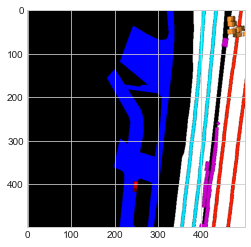

In [68]:
import matplotlib.pyplot as plt

img = feature.reshape((500, 500, 3))

plt.imshow(img)
plt.show()

[Top 1] prob: 0.11947298794984818


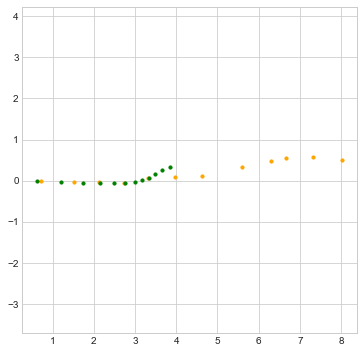

[Top 2] prob: 0.06767964363098145


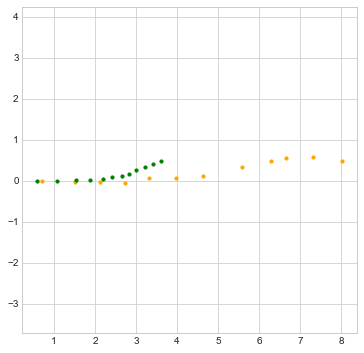

[Top 3] prob: 0.12491147220134735


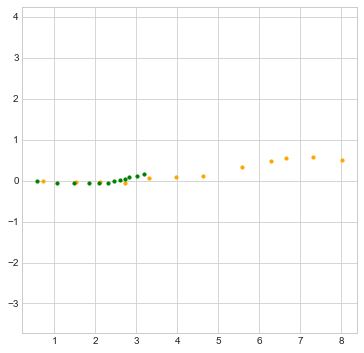

In [65]:
import matplotlib.pyplot as plt

def PlotPathWithPrediction(future, predict=[]):
    plt.figure(figsize=(6, 6))

    plt.scatter(future[:, 1], -future[:, 0], c='orange', s=10)
    
    if len(predict) > 0:
        plt.scatter(predict[:, 1], -predict[:, 0], c='g', s=10)

    # Keep aspect ratio of axis
    plt.axis('equal')
    plt.show()

    
# Plot top N trajectories
for i in range(3):
    print(f"[Top {i + 1}] prob: {mode_probabilities[i]}")
    PlotPathWithPrediction(gt, sorted_trajectories[i])